In [1]:
import pandas as pd
import seaborn as sns


churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_data.drop(['RowNumber'], axis=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


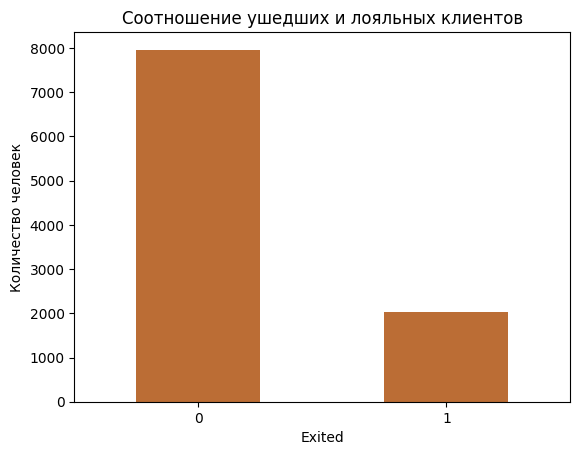

In [35]:
loyal = sns.barplot(
    x = churn_data['Exited'].value_counts().index,
    y = churn_data['Exited'].value_counts(),
    orient= 'v',
    width = 0.5,
    color='Chocolate'
)

loyal.set_title('Соотношение ушедших и лояльных клиентов');
loyal.set_ylabel('Количество человек');

Задание 9.1  
Исходя из данных графика, можно сделать вывод, что соотношение лояльных (0) и ушедших клиентов (1) примерно 4:1

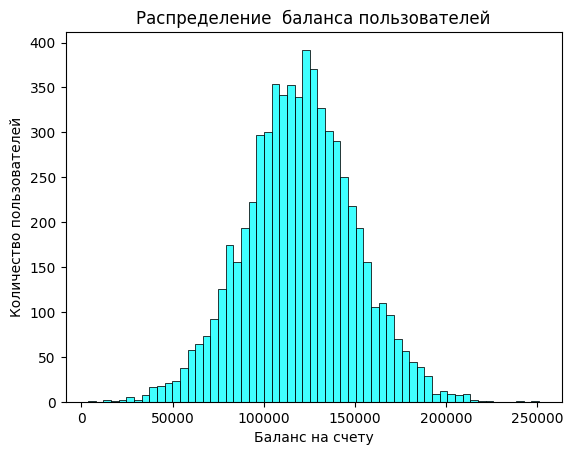

In [34]:
balance_data = churn_data[churn_data['Balance'] > 2500]

balance_distr = sns.histplot(
    data = balance_data,
    x = 'Balance',
    color = 'aqua'
)
balance_distr.set_title('Распределение  баланса пользователей');
balance_distr.set_xlabel('Баланс на счету');
balance_distr.set_ylabel('Количество пользователей');

Задание 9.2  
1) По графику видно, что большая часть пользователей обладает капиталом в размере от 100 до 150 тысяч  
2) Самый часто встречающийся размер счета - около 125-130 тысяч (модальное значение; около 400 пользователей)
3) Можно заметить, что доля пользователей, у которых на счету более 190 тысяч долларов, крайне мала и практически никто не обладает капиталом в 250 тысяч

In [5]:
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [36]:
bal_exit = px.histogram(
    data_frame = churn_data,
    x = 'Balance',
    color = 'Exited',
    color_discrete_sequence = ['chartreuse', 'coral'],
    height = 500,
    width = 700,
    histnorm = 'percent',
    title = 'Распределение баланса пользователей по признаку оттока'
)
bal_exit.show()

Задание 9.3  
По данным распределения видим, что:
1) большинство ушедших клиентов имели от 100 до 150 тысяч на счету (так же как и большинство лояльных клиентов) 
2) практически четверть ушедших обладала капиталом в размере до 2.5 тысяч (число лояльных клиентов в этом диапазоне превышает число ушедших примерно на 15%)
Можем сделать вывод, что баланс на счетах ушедших, в целом, был больше, чем у лояльных клиентов. 
  
Примерно с отметки в 77.5 - 82.5 тысяч соотношение лояльных и ушедших меняется, и количество последних начинает преобладать над количеством оставшихся. Из этого можем вывести тенденцию, что с какой-то определенной суммы, с увеличением кол-ва денег на счету, количество нелояльных клиентов увеличивается.
  
Возможной причиной такого тренда могут быть какие-то льготные условия или бонусы, которые клиент получает до момента "пересечения" определенной денежной границы, после которой либо ухудшаются условия, либо сгорает бонус. Также возможной причиной может служить внедрение комиссии за обслуживание банком при наличии определеннной суммы денег на счету

In [31]:
age_exit = px.histogram(
    data_frame = churn_data,
    x = 'Age',
    color = 'Exited',
    color_discrete_sequence = ['pink', 'navy'],
    height = 500,
    width = 700,
    histnorm = 'percent',
    title = 'Распределение возраста пользователей по признаку оттока',
    nbins=50
)
age_exit.show()

Задание 9.4  
По гистограмме можно сказать, что основная аудитория банка - молодые люди до 40 лет. Примерно начиная с отметки в 40 лет соотношение лояльных и нелояльных меняется в пользу уходящих, а также наблюдается наибольшее количество "всплесков". Поэтому банку стоит обратить особое внимание на возрастную группу 40-46 лет, где возникают самые резкие выбросы.

In [33]:
cred_sal = px.scatter(
    data_frame= churn_data,
    x= 'CreditScore',
    y= 'EstimatedSalary',
    color='Exited',
    title= 'Зависимость предполагаемой зарплаты от кредитного рейтинга',
    width= 800
)
cred_sal.show()

Задание 9.5  
Из графика видно, что люди с кредитным рейтингом до 400, все перестали быть клиентами банка, однако какой-либо общей зависимости предполагаемой зарплаты от кредитного рейтинга выявить невозможно. Люди как с высоким, так и с низким кредитным рейтингом получают зарплату разного размера

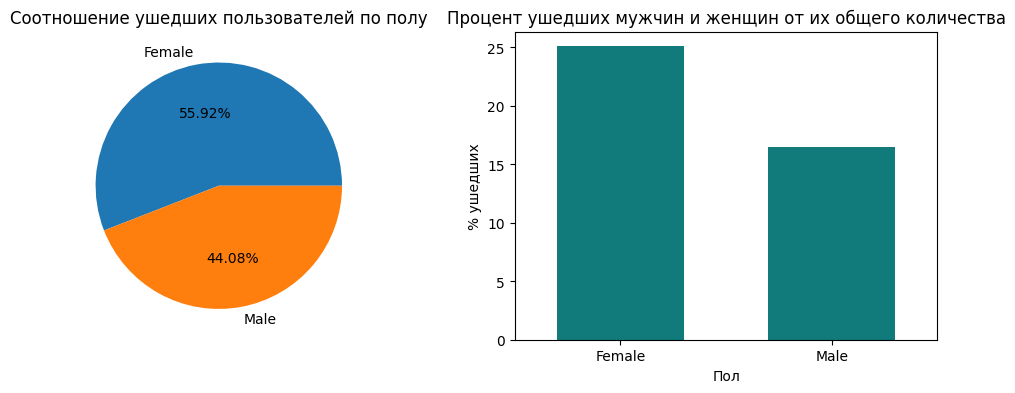

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

#Подготавливаем данные для круговой диаграммы
pre_data = churn_data[churn_data['Exited'] == 1]
exited_by_gender = pre_data.groupby(by="Exited")['Gender'].count()
int_exited_by_gender = int(exited_by_gender.iloc[0])
pie_data = pre_data.groupby(by="Gender")['Exited'].count()/int_exited_by_gender * 100

axes[0].pie(
    pie_data,
    labels=pie_data.index,
    autopct='%.2f%%'
);
axes[0].set_title('Соотношение ушедших пользователей по полу');


#Подготавливаем данные для столбчатой диаграммы
pre_data = churn_data[churn_data['Exited'] == 1]
exited_by_gender = pre_data.groupby(by="Gender")['Exited'].count()
gender_count = churn_data.value_counts('Gender')
gender_percent_exit = exited_by_gender/gender_count * 100

bar = sns.barplot(
    data= gender_percent_exit,
    color='darkcyan',
    width= 0.6
);
bar.set_title('Процент ушедших мужчин и женщин от их общего количества');
bar.set_xlabel('Пол')
bar.set_ylabel('% ушедших');

Задание 9.6  
Из круговой диаграммы видно, что почти 56% ушедших пользователей - женщины, соответственно 44% - мужчины.  
Если смотреть на соотношение уходящих в разрезе одного пола, то можно увидеть из столбчатой диаграммы, что из банка уходит примерно каждая 4ая женщщина и примерно каждый 6ой мужчина  
Вывод: женщины уходят чаще

In [12]:
#Находим количество оставшихся клиентов
churn_data['Loyal'] = 1 - churn_data['Exited']
pre_data = churn_data.groupby(by='NumOfProducts')[['Exited', 'Loyal']].sum()

fig = px.bar(
    pre_data,
    y=['Exited','Loyal'],
    title='Зависимость числа ушедших клиентов от числа приобретенных услуг',
    labels={'x': 'Количество приобретенных услуг', 'y':'Количество человек'},
    width=800
)
fig.show()

Задание 9.7  
По соотношениям оставшихся к ушедшим, можно сделать вывод, что с увеличением количества приобретенных услуг, доля уходящих клиентов увеличивается. Так, все клиенты, которые приобрели 4 услгуи банка, ушли, и большая часть клиентов с 3ся услугами также покинула банк.  
В абсолютных цифрах, большая часть ушедших клиентов имели 1у услугу, и с увеличением количества приобретенных услуг количество уходящих уменьшалось

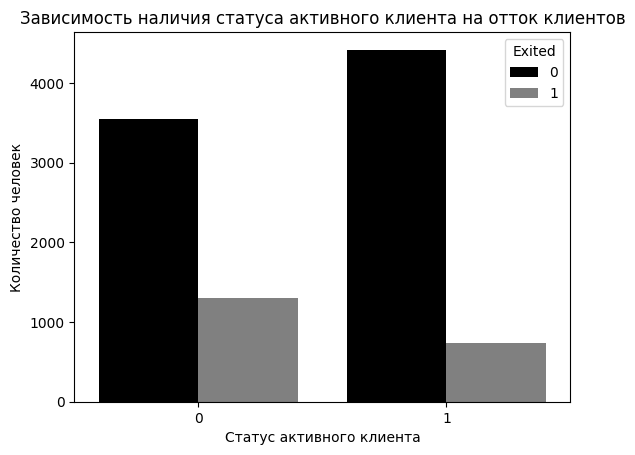

In [13]:
data = churn_data.groupby(by=['IsActiveMember', 'Exited']).size().reset_index(name='Количество человек')

fig = sns.barplot(
    data,
    x='IsActiveMember',
    y='Количество человек',
    hue='Exited',
    palette=['black', 'grey']
)
fig.set_title('Зависимость наличия статуса активного клиента на отток клиентов');
fig.set_xlabel('Статус активного клиента');

Задание 9.8  
Из диаграммы видно, что людей без статуса активного клиента ушло больше, чем людей, обладающих данным статусом.  
Чтобы уменьшить отток клиентов среди неактивных пользователей, можно увеличить перечень доступных им функций или добавить бонусы. Например можно ввести кэшбек за покупки в ходовых категориях (транспорт, еда) или добавить категорию "Спецпредложения", которая будет обновляться через фиксированный период времени и предоставлять скидку на какую-то услугу, товар и тд, вне зависимости от активности клиента


In [18]:
total_clients = churn_data['Geography'].value_counts()
df_0 = pd.DataFrame(total_clients).reset_index(names='Geography')

exit_clients = churn_data.groupby(by = ['Geography','Exited']).size().reset_index(name='Exited Count')
df = pd.DataFrame(exit_clients)
df = df[df['Exited']==1]

df = df.merge(df_0, on='Geography', how='outer')
df['Share'] = df['Exited Count']/df['count']

fig = px.choropleth(
    data_frame=df, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="Share", #от чего зависит цвет
    range_color=[0, 1],
    title='Соотношение ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='ylorbr' #палитра цветов
)

#отображаем его
fig.show()

Задание 9.9  
Из данных видно, что процент ушедших в Испании и Франции составляет примерно 16-17%, в то время как в Германии он достигает почти 33%. Возможно это связано с какими-то локальными ограничениями на работу международного банка в данной стране или введена политика протекционизма, из-за чего условия местных банков могут быть лучше.

9.10 новый признак = столбец.агг(функция)

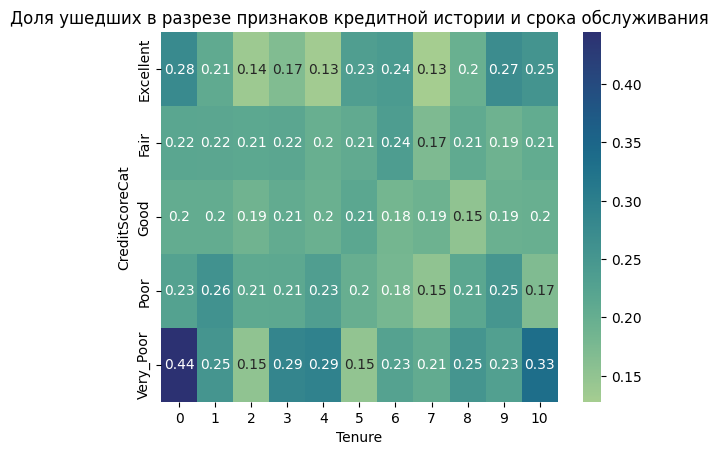

In [39]:
ch_data = churn_data.copy()

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
ch_data['CreditScoreCat'] = ch_data['CreditScore'].apply(get_credit_score_cat)

churn_table = ch_data.pivot_table(
    index= 'CreditScoreCat',
    columns= 'Tenure',
    values= 'Exited',
    aggfunc='mean'
)

churn_table.columns = churn_table.columns.astype('string')
fig = sns.heatmap(
    data=churn_table,
    annot=True,
    cmap='crest'
)
fig.set_title('Доля ушедших в разрезе признаков кредитной истории и срока обслуживания');

Задание 9.10  
Из тепловой карты видно, что в общем, чаще всего уходят клиенты с низким кредитным рейтингом. Так категория пользователей, которые уходят чаще всего - люди с низким кредитным рейтингом и которые только пришли в банк (количество лет обслуживания составляет 0 лет) - 44% уходят.  
На втором месте также люди с плохой кредитной историей, но пользующиеся услугами банка 10 лет. Их процент соствляет 33% от общего числа пользователей из категории.  
Примечательно, что среди людей с высоким кредитным рейтингом высокий процент ухода в первый год обсуживания (28%).  
Из этого можно сделать вывод, что данный банк больше всего подходит "среднечкам" - людям с приемлемой кредитной историей, которые пользуются услугами банка 3-8 лет
